# Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

## Load Dataset

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv('minpro_5.csv')
pd.set_option('display.max_columns',None)
df.sample(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
225,crushedMallard7,110450,Menikah,Pria,FullTime,Software Engineer (Android),Freshgraduate_program,Bagus,Jakarta Barat,Indeed,3,5.0,0.0,0.0,15.0,+6289949044xxx,crushedMallard7339@outlook.com,Magister,1,NaN,NaN,1977-08-19,2011-04-04,2020-1-14,-
211,affectedLemur7,100692,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Barat,Indeed,2,1.0,0.0,2.0,5.0,+6285717696xxx,affectedLemur7726@yahoo.com,Sarjana,1,NaN,leadership,1989-08-25,2014-07-07,2020-2-25,2017-11-15
190,mellowPudding2,105441,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Bagus,Jakarta Selatan,Employee_Referral,4,4.0,0.0,0.0,3.0,+6281218824xxx,mellowPudding2026@outlook.com,Sarjana,1,NaN,NaN,1980-03-02,2012-03-05,2020-2-21,-
143,obsessedSwift1,100561,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,2,3.0,6.0,0.0,2.0,+6281205790xxx,obsessedSwift1187@outlook.com,Sarjana,1,NaN,tidak_bisa_remote,1986-08-26,2015-3-30,2020-1-22,2020-4-29
103,sincereSeafowl4,110793,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_kurang,Jakarta Barat,Diversity_Job_Fair,3,4.0,0.0,0.0,2.0,+6285756514xxx,sincereSeafowl4749@hotmail.com,Sarjana,1,NaN,jam_kerja,1970-05-15,2011-11-07,2017-4-29,2018-11-15
218,annoyedSalt4,105685,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Mid_level,Sangat_kurang,Jakarta Selatan,LinkedIn,3,5.0,0.0,0.0,8.0,+6283898937xxx,annoyedSalt4842@hotmail.com,Magister,1,NaN,NaN,1974-05-31,2014-11-10,2020-2-13,-
43,shamefulIguana0,101682,Lainnya,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Barat,Indeed,3,5.0,0.0,0.0,4.0,+6281210001xxx,shamefulIguana0780@yahoo.com,Magister,1,0.0,masih_bekerja,1967-06-05,2013-2-18,2020-1-14,-
73,cruelCaviar1,110478,Belum_menikah,Wanita,Outsource,Software Engineer (Android),Freshgraduate_program,Sangat_kurang,Jakarta Pusat,Indeed,4,5.0,0.0,0.0,7.0,+6285654618xxx,cruelCaviar1334@outlook.com,Doktor,1,NaN,masih_bekerja,1963-05-15,2014-8-18,2020-1-21,-
271,bubblyPup4,100950,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Selatan,LinkedIn,2,5.0,0.0,0.0,4.0,+6289922130xxx,bubblyPup4032@proton.com,Doktor,1,NaN,NaN,1984-03-11,2016-06-06,2020-1-18,-
123,dopeyBass1,100398,Lainnya,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_kurang,Jakarta Utara,Google_Search,3,5.0,0.0,0.0,5.0,+6283144061xxx,dopeyBass1665@proton.com,Magister,1,NaN,masih_bekerja,1967-01-16,2011-01-10,2015-03-04,-


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

### Data Preprocessing

#### Mengisi Nilai Null

In [5]:
miss_value=df.isnull().sum().sort_values(ascending=False)[:8]
miss_value

IkutProgramLOP                        258
AlasanResign                           66
JumlahKetidakhadiran                    6
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
TanggalPenilaianKaryawan                0
TanggalHiring                           0
dtype: int64

In [6]:
total_rows = len(df)
miss_percent = (miss_value / total_rows) * 100
miss_percent = round(miss_percent, 2)[:8]
miss_percent

IkutProgramLOP                        89.90
AlasanResign                          23.00
JumlahKetidakhadiran                   2.09
SkorKepuasanPegawai                    1.74
JumlahKeikutsertaanProjek              1.05
JumlahKeterlambatanSebulanTerakhir     0.35
TanggalPenilaianKaryawan               0.00
TanggalHiring                          0.00
dtype: float64

In [7]:
df.describe()

,EnterpriseID,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,IkutProgramLOP
count,287.000000,287.000000,282.000000,284.000000,286.000000,281.000000,29.000000
mean,105923.324042,3.101045,3.904255,1.179577,0.412587,10.448399,0.517241
std,4044.977599,0.836388,0.913355,2.294441,1.275016,6.902252,0.508548
min,100282.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,101269.000000,3.000000,3.000000,0.000000,0.000000,5.000000,0.000000
50%,106069.000000,3.000000,4.000000,0.000000,0.000000,10.000000,1.000000
75%,110514.500000,4.000000,5.000000,0.000000,0.000000,15.000000,1.000000
max,111703.000000,5.000000,5.000000,8.000000,6.000000,55.000000,1.000000


Feature dengan nilai null : 
- IkutProgramLOP sebesar 89,9% dipertimbangkan untuk di hapus karena banyak sekali memiliki nilai null
- AlasanResign sebesar 23%, mengisi dengan nilai "masihbekerja" karena yang tidak mengisi ini, adalah orang yang tidak memiliki tanggal resign/masih bekerja
- JumlahKetidakhadiran sebesar 2,09% mengisi dengan nilai median
- SkorKepuasanPegawai sebesar 1,74% mengisi dengan nilai median
- JumlahKeikutsertaanProjek sebesar 1,05% mengisi dengan nilai median
- JumlahKeterlambatanSebulanTerakhir sebesar 0,35% mengisi dengan nilai median

In [8]:
#Menghapus Kolom IkutProgramLOP
df.drop(['IkutProgramLOP'], axis=1, inplace=True)

In [9]:
#Alasan Resign 
fill_value_alasan_resign = 'masih_bekerja'
df['AlasanResign'].fillna(fill_value_alasan_resign, inplace=True)

In [10]:
#Jumlah Ketidakhadiran
median_ketidakhadiran = df['JumlahKetidakhadiran'].median()
df['JumlahKetidakhadiran'].fillna(median_ketidakhadiran, inplace=True)

In [11]:
#SkorKepuasanPegawai
median_kepuasan_pegawai = df['SkorKepuasanPegawai'].median()
df['SkorKepuasanPegawai'].fillna(median_kepuasan_pegawai, inplace=True)

In [12]:
#JumlahKeikutsertaanProyek
median_keikutsertaan_projek = df['JumlahKeikutsertaanProjek'].median()
df['JumlahKeikutsertaanProjek'].fillna(median_keikutsertaan_projek, inplace=True)

In [13]:
#JumlahKeterlambatanSebulanTerakhir
median_keterlambatan = df['JumlahKeterlambatanSebulanTerakhir'].median()
df['JumlahKeterlambatanSebulanTerakhir'].fillna(median_keterlambatan, inplace=True)

In [14]:
df.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
267,importedOwl7,111336,Bercerai,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_kurang,Jakarta Barat,Diversity_Job_Fair,4,5.0,3.0,0.0,13.0,+6285664605xxx,importedOwl7056@icloud.com,Magister,1,masih_bekerja,1979-02-20,2011-11-07,2016-8-16,-
68,boastfulWasp1,110642,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Selatan,Indeed,4,4.0,0.0,0.0,6.0,+6285660996xxx,boastfulWasp1154@gmail.com,Doktor,1,tidak_bisa_remote,1978-12-02,2013-01-07,2020-1-18,2017-11-04
16,pacifiedRaisins7,101236,Menikah,Pria,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Pusat,Diversity_Job_Fair,3,4.0,0.0,0.0,12.0,+6289563833xxx,pacifiedRaisins7330@outlook.com,Sarjana,1,masih_bekerja,1976-12-03,2012-01-09,2020-1-31,-
59,lazyToucan3,106660,Bercerai,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Kurang,Jakarta Utara,Diversity_Job_Fair,3,5.0,0.0,0.0,11.0,+6287705186xxx,lazyToucan3860@gmail.com,Magister,1,masih_bekerja,1975-04-03,2009-4-27,2013-2-15,-
186,aloofChile5,105458,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,14.0,+6287843062xxx,aloofChile5822@outlook.com,Sarjana,1,masih_bekerja,1983-08-09,2016-1-28,2020-2-22,-


In [15]:
miss_value=df.isnull().sum().sort_values(ascending=False)[:8]
miss_value

Username                    0
EnterpriseID                0
TanggalPenilaianKaryawan    0
TanggalHiring               0
TanggalLahir                0
AlasanResign                0
PernahBekerja               0
TingkatPendidikan           0
dtype: int64

#### Mengganti value yang tidak sesuai
- Terdapat nilai Yes di featur kolom Pernah Bekerja

In [16]:
#Mengganti nilai Yes pada kolom PernahBekerja dengan nilai 1
df['PernahBekerja'].replace('Yes', 1, inplace=True)

#### Membuang data yang tidak diperlukan
Membuang kolom yang memiliki satu unique value (konstanta)

In [17]:
#Menghapus feature yang nilainya konstan
df.drop(['PernahBekerja'], axis=1, inplace=True)

In [18]:
df.sample(10)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
168,abjectRuffs3,101652,Bercerai,Pria,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Timur,Indeed,2,3.0,6.0,0.0,14.0,+6283157914xxx,abjectRuffs3176@proton.com,Sarjana,tidak_bahagia,1987-10-24,2017-4-20,2020-01-02,2020-9-26
6,madZebra1,100309,Menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,2,3.0,4.0,0.0,19.0,+6285735701xxx,madZebra1244@icloud.com,Sarjana,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,-
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5.0,0.0,0.0,20.0,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01
250,jubilantTeal7,106547,Lainnya,Pria,FullTime,DevOps Engineer,Freshgraduate_program,Bagus,Jakarta Barat,Employee_Referral,3,3.0,7.0,0.0,16.0,+6287898271xxx,jubilantTeal7049@hotmail.com,Magister,masih_bekerja,1970-02-08,2015-01-05,2020-1-14,-
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
244,curiousMackerel5,100667,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Bagus,Jakarta Pusat,Google_Search,4,4.0,0.0,0.0,4.0,+6289758085xxx,curiousMackerel5858@hotmail.com,Sarjana,masih_bekerja,1973-11-28,2014-9-18,2020-1-15,-
34,mereCaribou1,106529,Belum_menikah,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,3,3.0,0.0,0.0,2.0,+6282206634xxx,mereCaribou1593@gmail.com,Sarjana,masih_bekerja,1988-07-10,2014-9-29,2020-2-18,-
221,excludedPlover4,110746,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Barat,Google_Search,3,3.0,0.0,0.0,6.0,+6281258404xxx,excludedPlover4963@yahoo.com,Magister,masih_bekerja,1983-11-08,2011-04-04,2013-01-07,-
126,crushedRaisins0,100899,Lainnya,Wanita,FullTime,Software Engineer (Back End),Mid_level,Bagus,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,8.0,+6283805300xxx,crushedRaisins0204@gmail.com,Magister,masih_bekerja,1952-08-18,2012-01-09,2016-05-02,-
129,soreEggs6,105592,Lainnya,Pria,FullTime,Software Engineer (Android),Freshgraduate_program,Sangat_kurang,Jakarta Timur,LinkedIn,4,4.0,0.0,0.0,6.0,+6287725725xxx,soreEggs6451@yahoo.com,Magister,kejelasan_karir,1979-09-14,2011-11-07,2020-2-27,2014-04-07


### Annual Report on Employee Number Changes

#### Menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign 


In [19]:
df_1=df.copy()

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [21]:
# Mengubah kolom "TanggalHiring" dan "TanggalResign" ke tipe data datetime
df_1['TanggalHiring'] = pd.to_datetime(df_1['TanggalHiring'], errors='coerce')
df_1['TanggalResign'] = pd.to_datetime(df_1['TanggalResign'], errors='coerce')

In [22]:
# Mengekstrak tahun hiring dan resign
df_1['TahunHiring'] = df_1['TanggalHiring'].dt.year
df_1['TahunResign'] = df_1['TanggalResign'].dt.year

In [23]:
# Tabel Agregrate 1
karyawan_masuk = df_1.groupby('TahunHiring')['Username'].count().reset_index()
karyawan_masuk.rename(columns={'Username': 'JumlahKaryawanMasuk'}, inplace=True)
karyawan_masuk

,TahunHiring,JumlahKaryawanMasuk
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,76
6,2012,41
7,2013,43
8,2014,56
9,2015,31


In [24]:
#Tabel Agragrate 2
karyawan_keluar = df_1.groupby('TahunResign')['Username'].count().reset_index()
karyawan_keluar.rename(columns={'Username': 'JumlahKaryawanKeluar'}, inplace=True)
karyawan_keluar

,TahunResign,JumlahKaryawanKeluar
0,2013.0,5
1,2014.0,12
2,2015.0,8
3,2016.0,8
4,2017.0,19
5,2018.0,26
6,2019.0,5
7,2020.0,6


#### Join dua tabel tersebut berdasarkan tahun resign dan hiring


In [25]:
# Menggabungkan dua tabel agregat berdasarkan tahun resign dan tahun hiring dengan outer join
tabel_agregat = karyawan_masuk.merge(karyawan_keluar, left_on='TahunHiring', right_on='TahunResign', how='outer')
tabel_agregat = tabel_agregat[['TahunHiring','TahunResign', 'JumlahKaryawanMasuk', 'JumlahKaryawanKeluar']]
tabel_agregat

,TahunHiring,TahunResign,JumlahKaryawanMasuk,JumlahKaryawanKeluar
0,2006.0,NaN,1.0,NaN
1,2007.0,NaN,2.0,NaN
2,2008.0,NaN,2.0,NaN
3,2009.0,NaN,7.0,NaN
4,2010.0,NaN,8.0,NaN
5,2011.0,NaN,76.0,NaN
6,2012.0,NaN,41.0,NaN
7,2013.0,2013.0,43.0,5.0
8,2014.0,2014.0,56.0,12.0
9,2015.0,2015.0,31.0,8.0


#### Lakukan imputation pada data tahun yang kosong sesuai urutan

In [26]:
tabel_agregat['TahunHiring'].fillna(tabel_agregat['TahunResign'], inplace=True)
tabel_agregat['TahunResign'].fillna(tabel_agregat['TahunHiring'], inplace=True)
tabel_agregat['JumlahKaryawanMasuk'].fillna(0, inplace=True)
tabel_agregat['JumlahKaryawanKeluar'].fillna(0, inplace=True)
tabel_agregat['Tahun'] = tabel_agregat['TahunHiring']
tabel_agregat = tabel_agregat[['Tahun', 'JumlahKaryawanMasuk', 'JumlahKaryawanKeluar']]
tabel_agregat

,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar
0,2006.0,1.0,0.0
1,2007.0,2.0,0.0
2,2008.0,2.0,0.0
3,2009.0,7.0,0.0
4,2010.0,8.0,0.0
5,2011.0,76.0,0.0
6,2012.0,41.0,0.0
7,2013.0,43.0,5.0
8,2014.0,56.0,12.0
9,2015.0,31.0,8.0


#### Hitung total karyawan yang resign, yang masih bertahan, dan perubahannya pada setiap tahunnya


In [27]:
# Hitung total karyawan yang resign pada setiap tahun
total_karyawan_resign = tabel_agregat['JumlahKaryawanKeluar']
total_karyawan_masuk = tabel_agregat['JumlahKaryawanMasuk']


# Hitung total karyawan yang masih bertahan pada setiap tahun
total_karyawan_bertahan = total_karyawan_masuk - total_karyawan_resign 

# Hitung perubahan jumlah karyawan pada setiap tahun
perubahan_karyawan = total_karyawan_bertahan - total_karyawan_resign

# Menambahkan hasil perhitungan ke dalam tabel_agregat
tabel_agregat['TotalResign'] = total_karyawan_resign.cumsum()
tabel_agregat['TotalBertahan'] = total_karyawan_bertahan.cumsum()
tabel_agregat['Perubahan'] = perubahan_karyawan.cumsum()

tabel_agregat

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11372\1393367939.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabel_agregat['TotalResign'] = total_karyawan_resign.cumsum()


,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar,TotalResign,TotalBertahan,Perubahan
0,2006.0,1.0,0.0,0.0,1.0,1.0
1,2007.0,2.0,0.0,0.0,3.0,3.0
2,2008.0,2.0,0.0,0.0,5.0,5.0
3,2009.0,7.0,0.0,0.0,12.0,12.0
4,2010.0,8.0,0.0,0.0,20.0,20.0
5,2011.0,76.0,0.0,0.0,96.0,96.0
6,2012.0,41.0,0.0,0.0,137.0,137.0
7,2013.0,43.0,5.0,5.0,175.0,170.0
8,2014.0,56.0,12.0,17.0,219.0,202.0
9,2015.0,31.0,8.0,25.0,242.0,217.0


#### Plot yang menunjukan perubahan kenaikan dan penurunan di setiap tahun yang ada

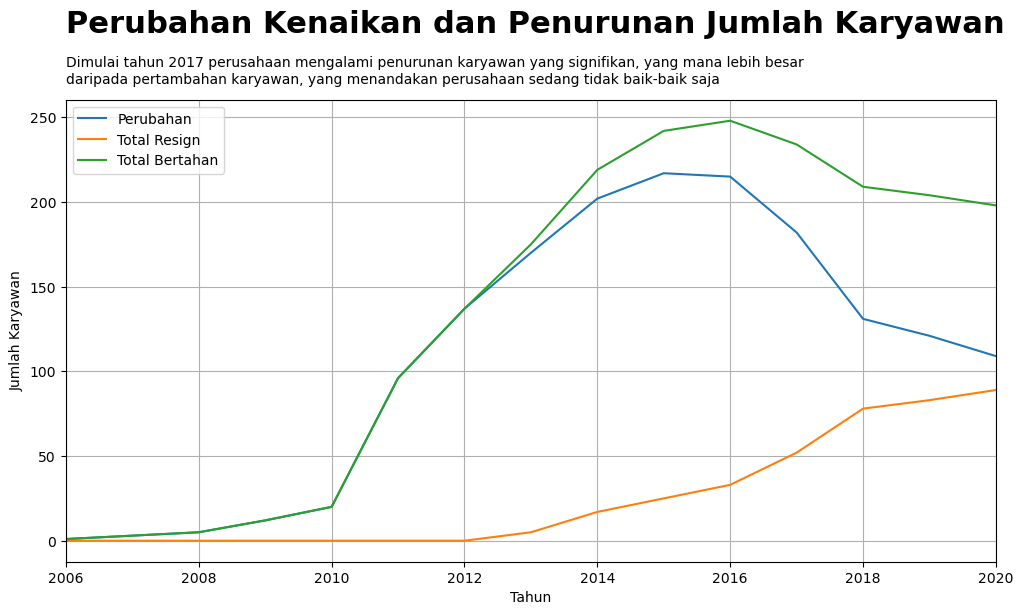

In [28]:
# Data yang akan diplot

tahun = tabel_agregat['Tahun']
perubahan = tabel_agregat['Perubahan']
total_resign = tabel_agregat['TotalResign']
total_bertahan = tabel_agregat['TotalBertahan']

# Membuat plot
plt.figure(figsize=(12, 6))
plt.plot(tahun, perubahan, label='Perubahan')
plt.plot(tahun, total_resign, label='Total Resign')
plt.plot(tahun, total_bertahan, label='Total Bertahan')

plt.text(x=2006,y=300,s='Perubahan Kenaikan dan Penurunan Jumlah Karyawan',fontsize=22, color='black', weight='bold')
plt.text(x=2006,y=280,s='Dimulai tahun 2017 perusahaan mengalami penurunan karyawan yang signifikan, yang mana lebih besar')
plt.text(x=2006,y=270,s='daripada pertambahan karyawan, yang menandakan perusahaan sedang tidak baik-baik saja')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Karyawan')
plt.grid(True)

# Mengatur rentang tahun pada sumbu x
plt.xlim(2006, 2020)

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()


####  Interpretasi

Pada tahun 2017, perusahaan mengalami penurunan karyawan yang signifikan. Karyawan yang resign jauh lebih tinggi daripada  karyawan yang masuk. Hal ini menunjukkan bahwa perusahaan mengalami fluktuasi karyawan yang besar pada tahun ini, dan penurunan menjadi tanda bahwa perusahaan sedang menghadapi tantangan atau masalah yang perlu segera diatasi.
Pada tahun 2018 hingga 2020, terlihat bahwa tidak ada pertambahan karyawan yang signifikan, sementara jumlah karyawan yang resign tetap tinggi. Ini mengindikasikan bahwa perusahaan belum mampu membalikkan tren negatif yang dimulai pada tahun 2017. Akibat hal tersebut, banyak proyek-proyek yang tidak selesai, yang dapat mempengaruhi produktivitas dan efisiensi perusahaan.


### Resign Reason Analysis for Employee Attrition Management Strategy


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [30]:
df_1.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,NaT,2011,NaN
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,2014,2018.0
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-09-24,2011,2014.0
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,NaT,2014,NaN
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,2013,2018.0


#### Membuat dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign

In [31]:
#Dataframe 1
# Membuat dataframe karyawan yang sudah resign
df_resigned = df_1[df_1['AlasanResign'] != 'masih_bekerja']

aggregated_resigned = df_resigned.groupby('Pekerjaan')['Username'].count().reset_index()
aggregated_resigned.rename(columns={'Username': 'JumlahKaryawanResigned'}, inplace=True)

aggregated_resigned

,Pekerjaan,JumlahKaryawanResigned
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [32]:
#Dataframe 1
# Membuat dataframe karyawan yang sudah masih bekerja
df_not_resigned = df_1[df_1['AlasanResign'] == 'masih_bekerja']

aggregated_not_resigned = df_not_resigned.groupby('Pekerjaan')['Username'].count().reset_index()
aggregated_not_resigned.rename(columns={'Username': 'JumlahKaryawanTidakResigned'}, inplace=True)

aggregated_not_resigned

,Pekerjaan,JumlahKaryawanTidakResigned
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


#### Menggabungkan kedua dataframe tersebut berdasarkan key Pekerjaan

In [33]:
# Menggabungkan kedua DataFrame berdasarkan kolom 'Pekerjaan' dengan outer join
merged_df = aggregated_resigned.merge(aggregated_not_resigned, on='Pekerjaan', how='outer')

# Mengisi nilai-nilai NaN dengan 0
merged_df['JumlahKaryawanResigned'].fillna(0, inplace=True)
merged_df['JumlahKaryawanTidakResigned'].fillna(0, inplace=True)

merged_df

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned
0,Data Analyst,8.0,8
1,Data Engineer,3.0,7
2,Product Design (UI & UX),9.0,15
3,Product Manager,6.0,11
4,Software Engineer (Android),7.0,17
5,Software Engineer (Back End),28.0,81
6,Software Engineer (Front End),28.0,44
7,DevOps Engineer,0.0,3
8,Digital Product Manager,0.0,2
9,Machine Learning Engineer,0.0,2


#### Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign)

In [34]:
# Menghitung total karyawan (JumlahEmployee)
merged_df['JumlahEmployee'] = merged_df['JumlahKaryawanResigned'] + merged_df['JumlahKaryawanTidakResigned']

# Menghitung persentase karyawan yang masih bekerja (PersentaseEmployeeMasihAda)
merged_df['PersentaseEmployeeMasihAda'] = (merged_df['JumlahKaryawanTidakResigned'] / merged_df['JumlahEmployee']) * 100

# Menampilkan DataFrame dengan kolom-kolom baru
merged_df

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned,JumlahEmployee,PersentaseEmployeeMasihAda
0,Data Analyst,8.0,8,16.0,50.000000
1,Data Engineer,3.0,7,10.0,70.000000
2,Product Design (UI & UX),9.0,15,24.0,62.500000
3,Product Manager,6.0,11,17.0,64.705882
4,Software Engineer (Android),7.0,17,24.0,70.833333
5,Software Engineer (Back End),28.0,81,109.0,74.311927
6,Software Engineer (Front End),28.0,44,72.0,61.111111
7,DevOps Engineer,0.0,3,3.0,100.000000
8,Digital Product Manager,0.0,2,2.0,100.000000
9,Machine Learning Engineer,0.0,2,2.0,100.000000


In [35]:
merged_df_sorted = merged_df.sort_values(by='PersentaseEmployeeMasihAda', ascending=True)

# Menampilkan DataFrame yang sudah diurutkan
merged_df_sorted

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned,JumlahEmployee,PersentaseEmployeeMasihAda
0,Data Analyst,8.0,8,16.0,50.000000
6,Software Engineer (Front End),28.0,44,72.0,61.111111
2,Product Design (UI & UX),9.0,15,24.0,62.500000
3,Product Manager,6.0,11,17.0,64.705882
1,Data Engineer,3.0,7,10.0,70.000000
4,Software Engineer (Android),7.0,17,24.0,70.833333
5,Software Engineer (Back End),28.0,81,109.0,74.311927
7,DevOps Engineer,0.0,3,3.0,100.000000
8,Digital Product Manager,0.0,2,2.0,100.000000
9,Machine Learning Engineer,0.0,2,2.0,100.000000


#### Plot persentase employee yang masih ada berdasarkan divisi pekerjaannya

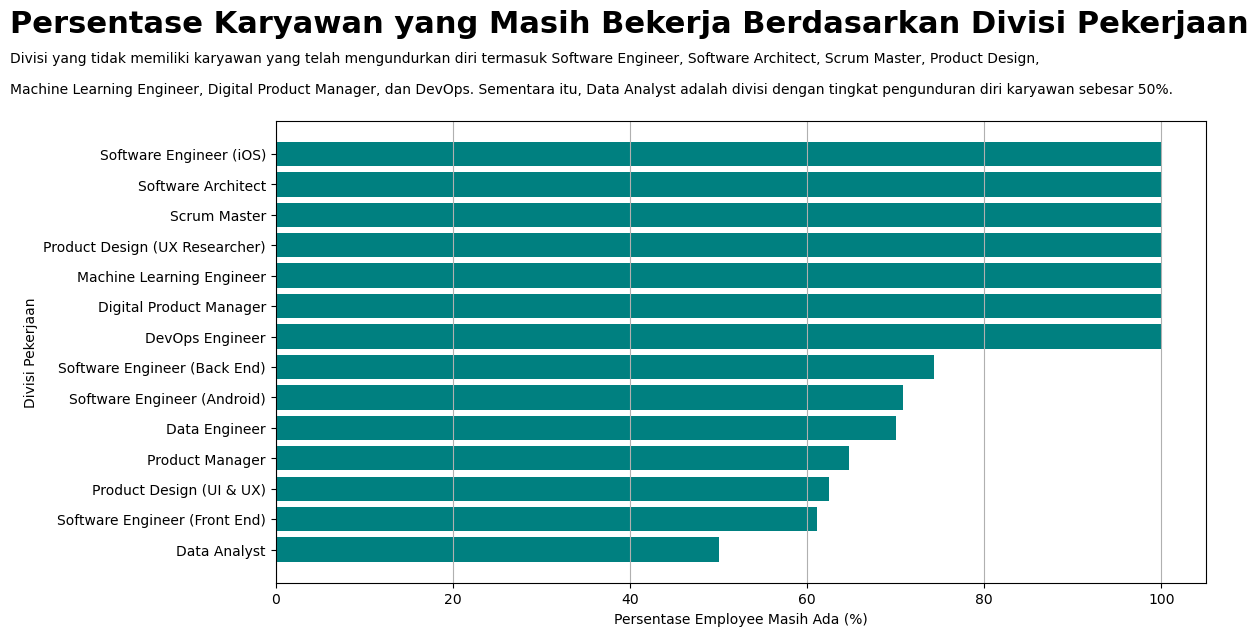

In [36]:
# Data yang akan diplot
pekerjaan = merged_df_sorted['Pekerjaan']
persentase_masih_ada = merged_df_sorted['PersentaseEmployeeMasihAda']

# Membuat plot
plt.figure(figsize=(12, 6))
plt.barh(pekerjaan, persentase_masih_ada, color='teal')

plt.text(x=-30,y=17,s='Persentase Karyawan yang Masih Bekerja Berdasarkan Divisi Pekerjaan',fontsize=22, color='black', weight='bold')
plt.text(x=-30, y=16, s='Divisi yang tidak memiliki karyawan yang telah mengundurkan diri termasuk Software Engineer, Software Architect, Scrum Master, Product Design,')
plt.text(x=-30, y=15, s='Machine Learning Engineer, Digital Product Manager, dan DevOps. Sementara itu, Data Analyst adalah divisi dengan tingkat pengunduran diri karyawan sebesar 50%.')

plt.xlabel('Persentase Employee Masih Ada (%)')
plt.ylabel('Divisi Pekerjaan')
plt.grid(axis='x')

# Menampilkan plot
plt.show()

#### Interpretasi 
Grafik  tersebut memberikan gambaran tentang persentase karyawan yang masih bekerja berdasarkan divisi pekerjaan. Terdapat 7 Divisi tidak memiliki pengunduran diri, sementara Data Analyst memiliki tingkat pengunduran diri sebesar 50%, yang perlu di analisis lebih lanjut terkait alasan apa yang menyebabkan karyawan mengundurkan diri.




#### Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign


In [37]:
# Menghitung persentase karyawan yang resign
merged_df['PersentaseResign'] = (merged_df['JumlahKaryawanResigned'] / merged_df['JumlahEmployee']) * 100

# Menampilkan DataFrame dengan kolom-kolom baru
merged_df

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned,JumlahEmployee,PersentaseEmployeeMasihAda,PersentaseResign
0,Data Analyst,8.0,8,16.0,50.000000,50.000000
1,Data Engineer,3.0,7,10.0,70.000000,30.000000
2,Product Design (UI & UX),9.0,15,24.0,62.500000,37.500000
3,Product Manager,6.0,11,17.0,64.705882,35.294118
4,Software Engineer (Android),7.0,17,24.0,70.833333,29.166667
5,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073
6,Software Engineer (Front End),28.0,44,72.0,61.111111,38.888889
7,DevOps Engineer,0.0,3,3.0,100.000000,0.000000
8,Digital Product Manager,0.0,2,2.0,100.000000,0.000000
9,Machine Learning Engineer,0.0,2,2.0,100.000000,0.000000


In [38]:
merged_df_sorted = merged_df.sort_values(by='PersentaseResign', ascending=False)

# Menampilkan DataFrame yang sudah diurutkan
merged_df_sorted

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned,JumlahEmployee,PersentaseEmployeeMasihAda,PersentaseResign
0,Data Analyst,8.0,8,16.0,50.000000,50.000000
6,Software Engineer (Front End),28.0,44,72.0,61.111111,38.888889
2,Product Design (UI & UX),9.0,15,24.0,62.500000,37.500000
3,Product Manager,6.0,11,17.0,64.705882,35.294118
1,Data Engineer,3.0,7,10.0,70.000000,30.000000
4,Software Engineer (Android),7.0,17,24.0,70.833333,29.166667
5,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073
7,DevOps Engineer,0.0,3,3.0,100.000000,0.000000
8,Digital Product Manager,0.0,2,2.0,100.000000,0.000000
9,Machine Learning Engineer,0.0,2,2.0,100.000000,0.000000


In [39]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [40]:
# Gabungkan df_1 dengan tabel agregrat
merged_df_1 = pd.merge(merged_df_sorted, df_1, left_on='Pekerjaan', right_on='Pekerjaan', how='inner')
merged_df_1

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned,JumlahEmployee,PersentaseEmployeeMasihAda,PersentaseResign,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,Data Analyst,8.0,8,16.0,50.0,50.0,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,2014,2018.0
1,Data Analyst,8.0,8,16.0,50.0,50.0,madZebra1,100309,Menikah,Wanita,FullTime,Freshgraduate_program,Biasa,Jakarta Utara,LinkedIn,2,3.0,4.0,0.0,19.0,+6285735701xxx,madZebra1244@icloud.com,Sarjana,masih_bekerja,1979-05-24,2014-11-10,2020-01-02,NaT,2014,NaN
2,Data Analyst,8.0,8,16.0,50.0,50.0,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4.0,0.0,0.0,17.0,+6281212698xxx,hushedSeahorse7404@icloud.com,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,2012,2017.0
3,Data Analyst,8.0,8,16.0,50.0,50.0,adoringCardinal9,101188,Lainnya,Wanita,FullTime,Mid_level,Sangat_bagus,Jakarta Barat,LinkedIn,4,5.0,0.0,0.0,10.0,+6289841872xxx,adoringCardinal9745@yahoo.com,Sarjana,masih_bekerja,1987-05-21,2015-03-30,2020-02-07,NaT,2015,NaN
4,Data Analyst,8.0,8,16.0,50.0,50.0,somberCod8,110312,Bercerai,Pria,FullTime,Mid_level,Sangat_bagus,Jakarta Barat,Employee_Referral,4,4.0,0.0,0.0,19.0,+6289954216xxx,somberCod8452@icloud.com,Sarjana,masih_bekerja,1983-02-18,2013-09-30,2020-2-25,NaT,2013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Scrum Master,0.0,3,3.0,100.0,0.0,selfishBurritos1,101037,Bercerai,Wanita,FullTime,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Google_Search,3,4.0,0.0,0.0,6.0,+6283181215xxx,selfishBurritos1329@hotmail.com,Sarjana,masih_bekerja,1970-10-08,2011-09-26,2014-1-30,NaT,2011,NaN
283,Software Architect,0.0,1,1.0,100.0,0.0,similarCardinal3,105902,Menikah,Wanita,FullTime,Mid_level,Sangat_bagus,Jakarta Selatan,CareerBuilder,4,4.0,0.0,0.0,5.0,+6285696756xxx,similarCardinal3436@icloud.com,Sarjana,masih_bekerja,1974-05-02,2014-05-12,2020-2-15,NaT,2014,NaN
284,Software Engineer (iOS),0.0,3,3.0,100.0,0.0,lyingAntelope8,110612,Belum_menikah,Pria,FullTime,Mid_level,Bagus,Jakarta Barat,Indeed,2,3.0,0.0,6.0,5.0,+6285936816xxx,lyingAntelope8984@outlook.com,Sarjana,masih_bekerja,1975-11-02,2014-09-29,2020-1-30,NaT,2014,NaN
285,Software Engineer (iOS),0.0,3,3.0,100.0,0.0,sheepishWidgeon1,101510,Belum_menikah,Wanita,Outsource,Mid_level,Bagus,Jakarta Selatan,Diversity_Job_Fair,1,4.0,0.0,5.0,4.0,+6289832939xxx,sheepishWidgeon1917@outlook.com,Magister,masih_bekerja,1968-06-06,2016-07-04,2020-2-18,NaT,2016,NaN


In [41]:
# Filter untuk alasan resign yang selain masih bekerja
merged_df_2= merged_df_1[merged_df_1['AlasanResign'] != 'masih_bekerja']
merged_df_2

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned,JumlahEmployee,PersentaseEmployeeMasihAda,PersentaseResign,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,Data Analyst,8.0,8,16.0,50.000000,50.000000,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,2014,2018.0
2,Data Analyst,8.0,8,16.0,50.000000,50.000000,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4.0,0.0,0.0,17.0,+6281212698xxx,hushedSeahorse7404@icloud.com,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,2012,2017.0
5,Data Analyst,8.0,8,16.0,50.000000,50.000000,sincereGatorade8,111089,Menikah,Wanita,Outsource,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,7.0,0.0,2.0,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,2016,2017.0
6,Data Analyst,8.0,8,16.0,50.000000,50.000000,brainyFish3,111083,Menikah,Pria,Outsource,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,3,3.0,0.0,0.0,20.0,+6285960968xxx,brainyFish3571@hotmail.com,Sarjana,toxic_culture,1984-05-09,2012-04-02,2014-2-20,2018-06-08,2012,2018.0
8,Data Analyst,8.0,8,16.0,50.000000,50.000000,troubledThrushe9,101192,-,Wanita,FullTime,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,4,3.0,0.0,0.0,20.0,+6281801928xxx,troubledThrushe9146@proton.com,Sarjana,toxic_culture,1987-01-07,2013-01-07,2020-1-30,2014-08-19,2013,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,outlyingCamel2,106467,Belum_menikah,Wanita,FullTime,Mid_level,Biasa,Jakarta Timur,Employee_Referral,3,5.0,6.0,0.0,15.0,+6281380903xxx,outlyingCamel2337@icloud.com,Sarjana,kejelasan_karir,1981-10-11,2015-02-16,2020-2-14,2018-04-01,2015,2018.0
253,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,morbidTruffle8,110725,Belum_menikah,Wanita,FullTime,Mid_level,Sangat_bagus,Jakarta Selatan,Google_Search,2,3.0,0.0,0.0,16.0,+6289652194xxx,morbidTruffle8334@icloud.com,Sarjana,jam_kerja,1955-04-14,2011-11-07,2017-02-04,2014-08-19,2011,2014.0
261,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,goofyMare7,101543,Bercerai,Wanita,FullTime,Freshgraduate_program,Biasa,Jakarta Selatan,LinkedIn,4,4.0,0.0,0.0,15.0,+6289546076xxx,goofyMare7910@outlook.com,Magister,jam_kerja,1985-08-24,2013-08-19,2020-2-15,2014-08-19,2013,2014.0
262,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,mildChowder7,111643,Belum_menikah,Wanita,FullTime,Mid_level,Sangat_kurang,Jakarta Pusat,Indeed,2,5.0,0.0,0.0,13.0,+6285951035xxx,mildChowder7653@yahoo.com,Sarjana,jam_kerja,1968-08-15,2012-05-14,2020-1-31,2017-11-15,2012,2017.0


In [42]:
# Mengidentifikasi divisi dengan persentase resign >= 50%
divisi_tertinggi = merged_df_2[merged_df_2['PersentaseResign'] >= 25]
divisi_tertinggi

,Pekerjaan,JumlahKaryawanResigned,JumlahKaryawanTidakResigned,JumlahEmployee,PersentaseEmployeeMasihAda,PersentaseResign,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,TahunHiring,TahunResign
0,Data Analyst,8.0,8,16.0,50.000000,50.000000,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-06-16,2014,2018.0
2,Data Analyst,8.0,8,16.0,50.000000,50.000000,hushedSeahorse7,111202,Bercerai,Wanita,FullTime,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4.0,0.0,0.0,17.0,+6281212698xxx,hushedSeahorse7404@icloud.com,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-02-05,2017-09-12,2012,2017.0
5,Data Analyst,8.0,8,16.0,50.000000,50.000000,sincereGatorade8,111089,Menikah,Wanita,Outsource,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,7.0,0.0,2.0,+6281225029xxx,sincereGatorade8842@icloud.com,Sarjana,toxic_culture,1987-06-14,2016-10-02,2020-01-08,2017-03-15,2016,2017.0
6,Data Analyst,8.0,8,16.0,50.000000,50.000000,brainyFish3,111083,Menikah,Pria,Outsource,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,3,3.0,0.0,0.0,20.0,+6285960968xxx,brainyFish3571@hotmail.com,Sarjana,toxic_culture,1984-05-09,2012-04-02,2014-2-20,2018-06-08,2012,2018.0
8,Data Analyst,8.0,8,16.0,50.000000,50.000000,troubledThrushe9,101192,-,Wanita,FullTime,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,4,3.0,0.0,0.0,20.0,+6281801928xxx,troubledThrushe9146@proton.com,Sarjana,toxic_culture,1987-01-07,2013-01-07,2020-1-30,2014-08-19,2013,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,outlyingCamel2,106467,Belum_menikah,Wanita,FullTime,Mid_level,Biasa,Jakarta Timur,Employee_Referral,3,5.0,6.0,0.0,15.0,+6281380903xxx,outlyingCamel2337@icloud.com,Sarjana,kejelasan_karir,1981-10-11,2015-02-16,2020-2-14,2018-04-01,2015,2018.0
253,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,morbidTruffle8,110725,Belum_menikah,Wanita,FullTime,Mid_level,Sangat_bagus,Jakarta Selatan,Google_Search,2,3.0,0.0,0.0,16.0,+6289652194xxx,morbidTruffle8334@icloud.com,Sarjana,jam_kerja,1955-04-14,2011-11-07,2017-02-04,2014-08-19,2011,2014.0
261,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,goofyMare7,101543,Bercerai,Wanita,FullTime,Freshgraduate_program,Biasa,Jakarta Selatan,LinkedIn,4,4.0,0.0,0.0,15.0,+6289546076xxx,goofyMare7910@outlook.com,Magister,jam_kerja,1985-08-24,2013-08-19,2020-2-15,2014-08-19,2013,2014.0
262,Software Engineer (Back End),28.0,81,109.0,74.311927,25.688073,mildChowder7,111643,Belum_menikah,Wanita,FullTime,Mid_level,Sangat_kurang,Jakarta Pusat,Indeed,2,5.0,0.0,0.0,13.0,+6285951035xxx,mildChowder7653@yahoo.com,Sarjana,jam_kerja,1968-08-15,2012-05-14,2020-1-31,2017-11-15,2012,2017.0


In [43]:
# Langkah 3: Menghitung jumlah karyawan yang resign berdasarkan kriteria
result = divisi_tertinggi.groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign']).size().reset_index(name='Jumlah Resign')
result

,JenjangKarir,PerformancePegawai,AlasanResign,Jumlah Resign
0,Freshgraduate_program,Bagus,ganti_karir,3
1,Freshgraduate_program,Bagus,jam_kerja,3
2,Freshgraduate_program,Bagus,kejelasan_karir,1
3,Freshgraduate_program,Bagus,leadership,2
4,Freshgraduate_program,Bagus,tidak_bisa_remote,1
5,Freshgraduate_program,Bagus,toxic_culture,2
6,Freshgraduate_program,Biasa,apresiasi,1
7,Freshgraduate_program,Biasa,ganti_karir,3
8,Freshgraduate_program,Biasa,internal_conflict,1
9,Freshgraduate_program,Biasa,jam_kerja,2


#### Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya

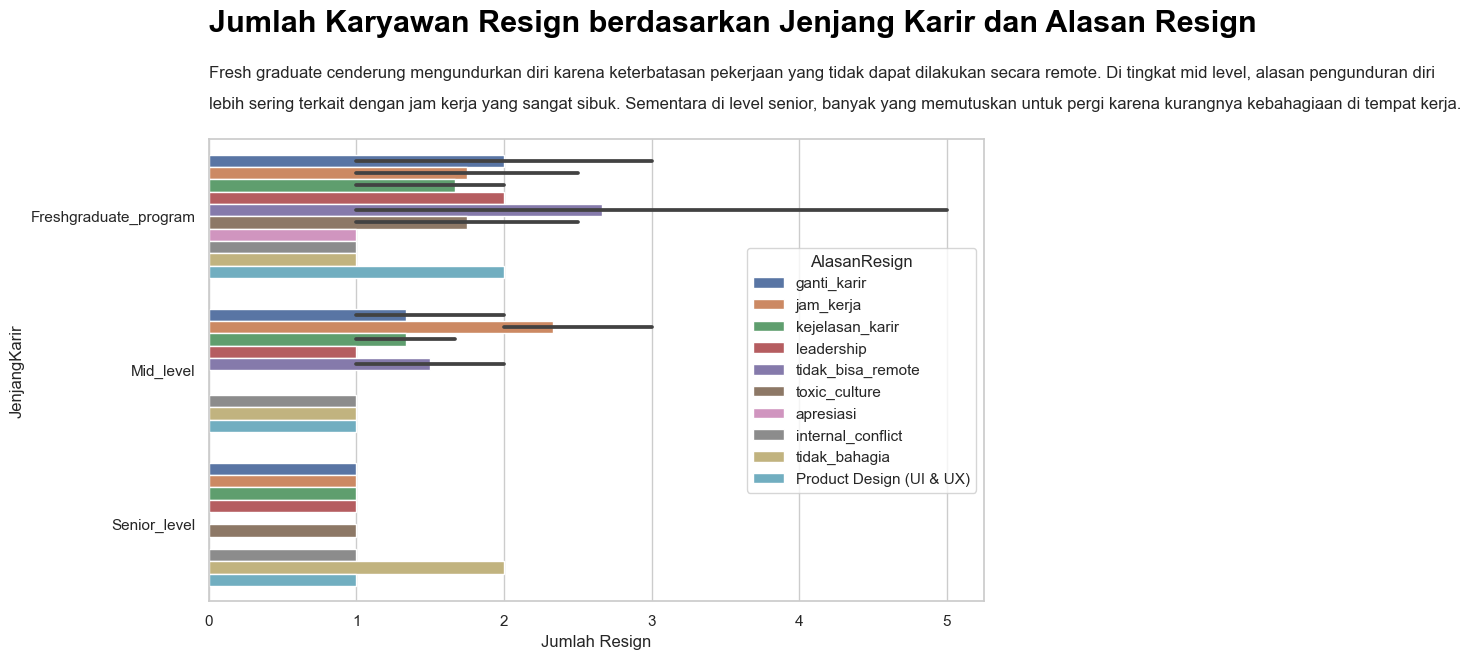

In [44]:
# Membuat plot menggunakan Seaborn dengan orientasi "h" (menghadap ke atas)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Menggunakan bar plot dengan orientasi "h" (menghadap ke atas) dan warna yang ditentukan oleh palet
sns.barplot(x="Jumlah Resign", y="JenjangKarir", hue="AlasanResign", data=result, orient="h")

plt.text(x=0,y=-1.2,s='Jumlah Karyawan Resign berdasarkan Jenjang Karir dan Alasan Resign',fontsize=22, color='black', weight='bold')
plt.text(x=0, y=-0.9, s='Fresh graduate cenderung mengundurkan diri karena keterbatasan pekerjaan yang tidak dapat dilakukan secara remote. Di tingkat mid level, alasan pengunduran diri')
plt.text(x=0, y=-0.7, s='lebih sering terkait dengan jam kerja yang sangat sibuk. Sementara di level senior, banyak yang memutuskan untuk pergi karena kurangnya kebahagiaan di tempat kerja.')


# Menampilkan plot
plt.show()

#### Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya
**Interpretasi**
Grafik ini menggambarkan alasan pengunduran diri karyawan berdasarkan tingkat pengalaman. Fresh graduate cenderung mengundurkan diri karena keterbatasan pekerjaan yang tidak bisa di-remote. Di tingkat mid level, pengunduran diri lebih sering terkait dengan jam kerja yang padat. Pada level senior, banyak yang mengundurkan diri karena kurangnya kebahagiaan di tempat kerja. Data ini memberikan wawasan tentang faktor-faktor yang mempengaruhi pengunduran diri karyawan pada berbagai tingkat pengalaman.

**Rekomendasi**
1. Fresh Graduate 

Disarankan untuk memberikan kesempatan untuk pekerjaan jarak jauh kepada karyawan yang memungkinkan, terutama bagi mereka yang bekerja di bidang IT seperti software engineer, yang dapat bekerja dari berbagai lokasi.

2. Middle level

Alasan pengunduran diri berkaitan dengan jam kerja yang terlalu padat, perusahaan bisa mempertimbangkan untuk menambah jumlah karyawan di tim atau departemen terkait. Dengan cara ini, beban kerja dapat lebih merata dan mengurangi tekanan individual.

3. Senior level 

Perusahaan dapat fokus pada fasilitas dan program kesejahteraan karyawan, termasuk program kesehatan, kegiatan sosial, pengembangan diri, dan keseimbangan kerja-kehidupan pribadi. Hal ini akan membantu menciptakan lingkungan kerja yang lebih seimbang dan menyenangkan.



### Modeling

### Data preprocessing

In [45]:
df_2=df.copy()
df_2.sample(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
99,peskyFlamingo7,111049,Bercerai,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_kurang,Jakarta Timur,Indeed,3,3.0,0.0,0.0,17.0,+6285710742xxx,peskyFlamingo7657@proton.com,Sarjana,masih_bekerja,1980-02-02,2011-01-10,2020-1-21,-
145,forsakenAntelope5,105923,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Bagus,Jakarta Pusat,Indeed,2,5.0,0.0,0.0,16.0,+6287890050xxx,forsakenAntelope5142@gmail.com,Sarjana,masih_bekerja,1984-02-16,2011-8-15,2013-03-05,-
60,cockyTeal5,105937,Lainnya,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Utara,Indeed,3,3.0,4.0,0.0,6.0,+6285899573xxx,cockyTeal5115@icloud.com,Sarjana,masih_bekerja,1985-09-16,2015-2-16,2016-4-15,-
33,madFerret4,106540,Belum_menikah,Wanita,Outsource,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,LinkedIn,3,3.0,6.0,0.0,7.0,+6281222388xxx,madFerret4760@hotmail.com,Magister,masih_bekerja,1981-04-14,2014-9-30,2020-01-07,-
93,gloomyClam6,100919,Belum_menikah,Pria,FullTime,Software Engineer (Back End),Freshgraduate_program,Kurang,Jakarta Timur,Indeed,2,5.0,0.0,0.0,9.0,+6285908172xxx,gloomyClam6755@gmail.com,Doktor,jam_kerja,1988-09-14,2014-8-18,2020-1-30,2015-6-24


In [46]:
# Change column data type 'PernahBekerja' dan 'IkutProgramLOP' menjadi integer, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, etc.
df_2['JumlahKeikutsertaanProjek'] = pd.to_numeric(df_2['JumlahKeikutsertaanProjek'], errors='coerce').astype(pd.Int64Dtype())
df_2['JumlahKeterlambatanSebulanTerakhir'] = pd.to_numeric(df_2['JumlahKeterlambatanSebulanTerakhir'], errors='coerce').astype(pd.Int64Dtype())
df_2['JumlahKetidakhadiran'] = pd.to_numeric(df_2['JumlahKetidakhadiran'], errors='coerce').astype(pd.Int64Dtype())

# Change column data type 'TanggalLahir', 'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign' menjadi datetime
df_2['TanggalLahir'] = pd.to_datetime(df_2['TanggalLahir'], errors='coerce')
df_2['TanggalHiring'] = pd.to_datetime(df_2['TanggalHiring'], errors='coerce')
df_2['TanggalPenilaianKaryawan'] = pd.to_datetime(df_2['TanggalPenilaianKaryawan'], errors='coerce')

In [47]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            287 non-null    object        
 1   EnterpriseID                        287 non-null    int64         
 2   StatusPernikahan                    287 non-null    object        
 3   JenisKelamin                        287 non-null    object        
 4   StatusKepegawaian                   287 non-null    object        
 5   Pekerjaan                           287 non-null    object        
 6   JenjangKarir                        287 non-null    object        
 7   PerformancePegawai                  287 non-null    object        
 8   AsalDaerah                          287 non-null    object        
 9   HiringPlatform                      287 non-null    object        
 10  SkorSurveyEngagement      

In [48]:
# Missing Value
miss_value=df_2.isnull().sum().sort_values(ascending=False)[:8]
miss_value

Username                     0
JumlahKeikutsertaanProjek    0
TanggalPenilaianKaryawan     0
TanggalHiring                0
TanggalLahir                 0
AlasanResign                 0
TingkatPendidikan            0
Email                        0
dtype: int64

In [49]:
# Check Duplicate Data
df_2.duplicated().sum()

0

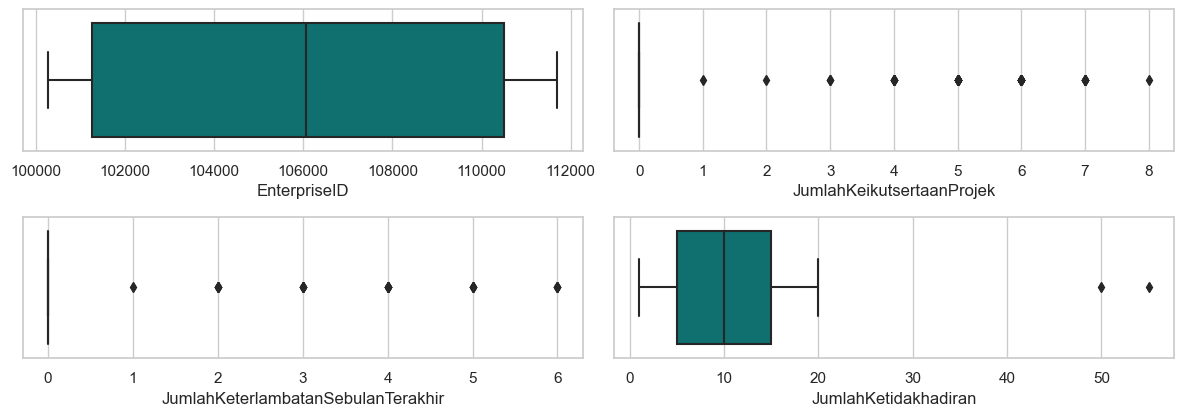

In [50]:
#Handling Outlier
num =['EnterpriseID','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran']
plt.figure(figsize = (12,8))
for i in range(len(num)):
  plt.subplot(4,2, i + 1)
  sns.boxplot(x = df[num[i]], orient = 'h', color='teal' )
  plt.tight_layout()

In [51]:
# Feature Extraction
# Mengganti nilai '-' menjadi 0 dalam kolom TanggalResign
df_2['TanggalResign'] = df_2['TanggalResign'].replace('-','No' )
df_2.head(5)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0,0,9,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,No
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4,0,3,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0,0,11,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0,4,6,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,No
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0,0,11,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,2018-09-06


In [52]:
#menganti tanggal resign, menjadi 1 yang mengindikasikan bahwa karyawan resign
df_2['TanggalResign'] = df_2['TanggalResign'].apply(lambda x: 'Yes' if x != 'No' else x)


In [53]:
df_2.sample(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
68,boastfulWasp1,110642,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Biasa,Jakarta Selatan,Indeed,4,4.0,0,0,6,+6285660996xxx,boastfulWasp1154@gmail.com,Doktor,tidak_bisa_remote,1978-12-02,2013-01-07,2020-01-18,Yes
209,soreTruffle3,105808,Lainnya,Wanita,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_kurang,Jakarta Timur,Indeed,2,4.0,0,0,3,+6285636782xxx,soreTruffle3888@outlook.com,Magister,masih_bekerja,1980-05-08,2014-09-29,2020-02-07,No
188,giddyCod5,110980,Belum_menikah,Wanita,FullTime,Software Engineer (Android),Freshgraduate_program,Bagus,Jakarta Pusat,Employee_Referral,3,5.0,0,0,7,+6287822509xxx,giddyCod5287@proton.com,Doktor,leadership,1966-03-22,2013-09-30,2020-02-22,Yes


In [54]:
#Mencetak nilai unik dalam status pernikahan
unique_marital_status = df_2['StatusPernikahan'].unique()

# Mencetak nilai unik
print("Nilai Unik dari statuspernikahan:")
for status in unique_marital_status:
    print(status)

Nilai Unik dari statuspernikahan:
Belum_menikah
Menikah
Bercerai
Lainnya
-


In [55]:
#menganti nilai Lainnya dan - menjadi Belum_menikah, dengan asumsi yang memilih tersebut belum menikah
df_2['StatusPernikahan'] = df_2['StatusPernikahan'].replace(['Lainnya', '-'], 'Belum_menikah')
df_2.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0,0,9,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,No
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4,0,3,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,Yes
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0,0,11,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,Yes
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0,4,6,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,No
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0,0,11,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,Yes


In [56]:
#Mengubah kolom tanggal resign menjadi kolom resign, yang menandakan bahwa karyawan itu resign atau tidak
df_2.rename(columns={'TanggalResign': 'Resign'}, inplace=True)

In [57]:
df_2.head(3)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,Resign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0,0,9,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,No
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4,0,3,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,Yes
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0,0,11,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,Yes


In [58]:
# Feature Selection
df_3=df_2.copy()
df_3.sample(2)

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,Resign
281,anxiousWasp6,100628,Bercerai,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Indeed,2,5.0,7,0,15,+6281806218xxx,anxiousWasp6788@outlook.com,Sarjana,masih_bekerja,1983-09-04,2017-02-15,2020-01-23,No
252,crushedHyena6,111299,Belum_menikah,Wanita,FullTime,Machine Learning Engineer,Freshgraduate_program,Biasa,Jakarta Selatan,Indeed,4,5.0,0,0,5,+6285683201xxx,crushedHyena6043@yahoo.com,Sarjana,masih_bekerja,1985-11-23,2014-11-10,2020-01-16,No


In [59]:
#Drop Kolom, Jenis Kelamin, Status Pernikahan, EterpriseID, Nomor Hp, Email, Username, AsalDaerah
drop_kolom= ['Username','JenisKelamin', 'EnterpriseID', 'NomorHP', 'Email','AsalDaerah','TanggalLahir','HiringPlatform','TanggalHiring','TanggalPenilaianKaryawan']
df_3 = df_3.drop(columns=drop_kolom)

In [60]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   StatusKepegawaian                   287 non-null    object 
 2   Pekerjaan                           287 non-null    object 
 3   JenjangKarir                        287 non-null    object 
 4   PerformancePegawai                  287 non-null    object 
 5   SkorSurveyEngagement                287 non-null    int64  
 6   SkorKepuasanPegawai                 287 non-null    float64
 7   JumlahKeikutsertaanProjek           287 non-null    Int64  
 8   JumlahKeterlambatanSebulanTerakhir  287 non-null    Int64  
 9   JumlahKetidakhadiran                287 non-null    Int64  
 10  TingkatPendidikan                   287 non-null    object 
 11  AlasanResign                        287 non-n

In [61]:
# Feature Engineering
df_3['Resign'] = df_3['Resign'].replace({'No':0,'Yes':1})

In [62]:
df_3.sample(3)

,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,Resign
81,Belum_menikah,FullTime,Data Engineer,Freshgraduate_program,Kurang,3,5.0,0,0,3,Sarjana,masih_bekerja,0
131,Bercerai,FullTime,Software Engineer (Front End),Freshgraduate_program,Kurang,4,5.0,0,0,9,Sarjana,masih_bekerja,0
234,Belum_menikah,FullTime,Software Engineer (Android),Freshgraduate_program,Biasa,4,5.0,0,0,19,Doktor,masih_bekerja,0


In [63]:
#Label Encoding (Jenjang Karir, PerfomancePegawai, Tingkat Pendidikan,SkorKepuasanPegawai)

cat_1=['JenjangKarir','PerformancePegawai','TingkatPendidikan','SkorKepuasanPegawai']
cat_cols = []
for col in cat_1:
    map_dict = {k:i for i, k in enumerate(df_3[col].value_counts().index,0)}
    df_3[col] = df_3[col].map(map_dict)

In [64]:
df_3.head()

,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,Resign
0,Belum_menikah,Outsource,Software Engineer (Back End),0,2,4,2,0,0,9,1,masih_bekerja,0
1,Belum_menikah,FullTime,Data Analyst,0,4,4,2,4,0,3,0,toxic_culture,1
2,Menikah,FullTime,Software Engineer (Front End),0,1,4,0,0,0,11,1,jam_kerja,1
3,Belum_menikah,Outsource,Software Engineer (Front End),0,1,3,0,0,4,6,0,masih_bekerja,0
4,Belum_menikah,FullTime,Product Manager,0,1,3,0,0,0,11,0,ganti_karir,1


In [65]:
print(df_3.columns)

Index(['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir',
       'PerformancePegawai', 'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'AlasanResign', 'Resign'],
      dtype='object')


In [66]:
#One Hot Encoding (Status Kepegawaian, Pekerjaan, Alasan Resign)
cat_2=['StatusKepegawaian','StatusPernikahan','Pekerjaan','AlasanResign']
for cat in cat_2[:]:
   nominal_encoded = pd.get_dummies(df_3[cat], prefix=cat)
   df_3 = pd.concat([df_3, nominal_encoded], axis=1)
for column in df_3.columns:
 if df_3[column].dtype == object and column != 'Resign':
    df_3.drop(column, axis = 1, inplace = True)

In [67]:
df_3.head()

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Menikah,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_masih_bekerja,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
0,0,2,4,2,0,0,9,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,4,4,2,4,0,3,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,4,0,0,0,11,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,3,0,0,4,6,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,3,0,0,0,11,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [68]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   JenjangKarir                              287 non-null    int64
 1   PerformancePegawai                        287 non-null    int64
 2   SkorSurveyEngagement                      287 non-null    int64
 3   SkorKepuasanPegawai                       287 non-null    int64
 4   JumlahKeikutsertaanProjek                 287 non-null    Int64
 5   JumlahKeterlambatanSebulanTerakhir        287 non-null    Int64
 6   JumlahKetidakhadiran                      287 non-null    Int64
 7   TingkatPendidikan                         287 non-null    int64
 8   Resign                                    287 non-null    int64
 9   StatusKepegawaian_FullTime                287 non-null    uint8
 10  StatusKepegawaian_Internship              287 non-null    uint

In [261]:
#Drop alasan resign masih bekerja, karena ini sama dengna kolom resign, yang mengindikasikan bahwa dia resign atau tidak
df_4=df_3.copy()
df_4 = df_4.drop("AlasanResign_masih_bekerja", axis=1)

In [262]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   JenjangKarir                              287 non-null    int64
 1   PerformancePegawai                        287 non-null    int64
 2   SkorSurveyEngagement                      287 non-null    int64
 3   SkorKepuasanPegawai                       287 non-null    int64
 4   JumlahKeikutsertaanProjek                 287 non-null    Int64
 5   JumlahKeterlambatanSebulanTerakhir        287 non-null    Int64
 6   JumlahKetidakhadiran                      287 non-null    Int64
 7   TingkatPendidikan                         287 non-null    int64
 8   Resign                                    287 non-null    int32
 9   StatusKepegawaian_FullTime                287 non-null    uint8
 10  StatusKepegawaian_Internship              287 non-null    uint

df_4['Resign'] = df_4['Resign'].astype(int, errors='ignore')

### Split Train and Test

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [416]:
resign_count = df_4['Resign'].value_counts()
print("Jumlah Karyawan yang Resign:", resign_count[1])  # Jumlah yang resign
print("Jumlah Karyawan yang Tidak Resign:", resign_count[0])  # Jumlah yang tidak resign

Jumlah Karyawan yang Resign: 89
Jumlah Karyawan yang Tidak Resign: 198


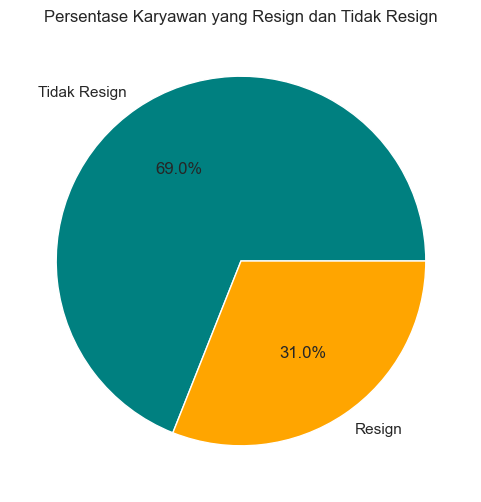

In [264]:
import matplotlib.pyplot as plt

resign_count = df_4['Resign'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(resign_count, labels=['Tidak Resign', 'Resign'], autopct='%1.1f%%', colors=['teal', 'orange'])
plt.title('Persentase Karyawan yang Resign dan Tidak Resign')
plt.show()

In [265]:
df_sp=df_4.copy()

In [266]:
X = df_sp.drop(['Resign'],axis=1,inplace=False)
y = df_sp['Resign']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=422, stratify = y)

In [267]:
## Imbalance Data
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 111 to 113
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   JenjangKarir                              200 non-null    int64
 1   PerformancePegawai                        200 non-null    int64
 2   SkorSurveyEngagement                      200 non-null    int64
 3   SkorKepuasanPegawai                       200 non-null    int64
 4   JumlahKeikutsertaanProjek                 200 non-null    Int64
 5   JumlahKeterlambatanSebulanTerakhir        200 non-null    Int64
 6   JumlahKetidakhadiran                      200 non-null    Int64
 7   TingkatPendidikan                         200 non-null    int64
 8   StatusKepegawaian_FullTime                200 non-null    uint8
 9   StatusKepegawaian_Internship              200 non-null    uint8
 10  StatusKepegawaian_Outsource               200 non-null    ui

In [268]:
Xtrain.head(5)

,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,StatusKepegawaian_FullTime,StatusKepegawaian_Internship,StatusKepegawaian_Outsource,StatusPernikahan_Belum_menikah,StatusPernikahan_Bercerai,StatusPernikahan_Menikah,Pekerjaan_Data Analyst,Pekerjaan_Data Engineer,Pekerjaan_DevOps Engineer,Pekerjaan_Digital Product Manager,Pekerjaan_Machine Learning Engineer,Pekerjaan_Product Design (UI & UX),Pekerjaan_Product Design (UX Researcher),Pekerjaan_Product Manager,Pekerjaan_Scrum Master,Pekerjaan_Software Architect,Pekerjaan_Software Engineer (Android),Pekerjaan_Software Engineer (Back End),Pekerjaan_Software Engineer (Front End),Pekerjaan_Software Engineer (iOS),AlasanResign_Product Design (UI & UX),AlasanResign_apresiasi,AlasanResign_ganti_karir,AlasanResign_internal_conflict,AlasanResign_jam_kerja,AlasanResign_kejelasan_karir,AlasanResign_leadership,AlasanResign_tidak_bahagia,AlasanResign_tidak_bisa_remote,AlasanResign_toxic_culture
111,2,0,3,1,0,0,16,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
228,0,1,4,0,0,0,20,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
248,0,1,4,2,0,0,20,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
234,0,0,4,1,0,0,19,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
141,0,2,3,1,0,0,13,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [269]:
ytrain.value_counts()

0    138
1     62
Name: Resign, dtype: int64

In [271]:
Xtrain = Xtrain.astype('float64')
ytrain = ytrain.astype('int32')

In [272]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=4022)
Xtrain_over, ytrain_over = smote.fit_resample(Xtrain, ytrain)

print('SMOTE')
print(pd.Series(ytrain_over).value_counts())

SMOTE
0    138
1    138
Name: Resign, dtype: int64


### Modeling

In [273]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
import time
def eval_classification(model, smote=True):
    y_pred = model.predict(Xtest)
    y_pred_train = model.predict(Xtrain)
    y_pred_proba = model.predict_proba(Xtest)
    y_pred_proba_train = model.predict_proba(Xtrain)


    model1 = Pipeline([
        ('sampling', SMOTE(sampling_strategy=1, random_state=4022)),
        ('classification', model)
    ])

    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

    if smote==True:
      cv = RepeatedStratifiedKFold(random_state=42, n_repeats = 3)
      score = cross_validate(model1, X=Xtrain, y=ytrain, cv=cv, scoring='roc_auc', return_train_score=True)
      print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
      print('roc_auc (crossval test): '+ str(score['test_score'].mean()))


def grid_pipe(pipedict, hyperdict, scoring='recall', display=True):
    fitted_models={}
    for name, pipeline in pipedict.items():
    # Construct grid search
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=5, verbose=2, n_jobs=-1, return_train_score = True)

        # Fit using grid search
        start = time.time()
        model.fit(Xtrain, ytrain)
        end = time.time()

        #Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models

def confusion(model):
    y_pred_proba = model.predict_proba(Xtest)
    y_predict = model.predict(Xtest)
    print('Accuracy: %.2f%%' % (accuracy_score(ytest, y_predict) * 100 ))
    print('Precision: %.2f%%' % (precision_score(ytest, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(ytest, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(ytest, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(ytest, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(ytest, y_predict)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

### Fit Model and Evaluation
Untuk metrics evaluasi akan fokus kepada Recall dikarenakan ingin mengurangi false negative rate agar sebanyak-banyak nya employee yang akan attrition terprediksi attrition dan dapat diberikan treatment yang sesuai. Akan dieksperimen 4 model yang berbeda untuk modelling pada dataset ini yaitu; Logistic Regression, Adaboost, Random Forest, dan XGBoost, dan akan dipilih satu model terbaik berdasarkan recall dan accuracy.

#### **Logistic Regresion**

In [274]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain_over, ytrain_over)

eval_classification(logreg)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy (Test Set): 1.00
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

roc_auc (crossval train): 0.9997449107734823
roc_auc (crossval test): 0.9848494098494098


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Adaboost**

In [275]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(Xtrain_over, ytrain_over)
eval_classification(ada)

Accuracy (Test Set): 1.00
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
Recall (Train Set): 1.00
F1-Score (Test Set): 1.00
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 1.0


####  **Random Forest**

In [276]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 402)
rf.fit(Xtrain_over, ytrain_over)

eval_classification(rf)

Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9859703568036902


#### **XGboost**

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [277]:
from xgboost import XGBClassifier
xg = XGBClassifier(nthread=3, tree_method='hist', predictor='cpu_predictor')

xg.fit(Xtrain_over, ytrain_over)

eval_classification(xg)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (Test Set): 0.98
Accuracy (Train Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 1.00
F1-Score (Test Set): 0.96
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWar

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9031050739384076


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


#### Hyperparameter Tuning

In [391]:
#Create pipeline for each of the classifiers.
pipelines = {'logisticregression': Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=4022)),
                                            ('clf', LogisticRegression())]),
            'adaboost':Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=4022)),
                                            ('clf', AdaBoostClassifier())]),
            'randomforest':Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=4022)),
                                            ('clf', RandomForestClassifier(random_state = 402))]),
            'xgboost': Pipeline([('sampling', SMOTE(sampling_strategy=1, random_state=4022)),
                                            ('clf', XGBClassifier(nthread=6, tree_method='hist',  predictor='cpu_predictor'))])}

# Define hyperparameters for each pipeline
hyperparameters_lr = {'clf__C': [0.1,0.4,0.6], 'clf__penalty': ['l2', 'none']}

hyperparameters_ada = {'clf__learning_rate': [2,2.3],
                      'clf__n_estimators': [30,50,60]}

hyperparameters_rf ={'clf__n_estimators': [50],
                     'clf__criterion': ['entropy', 'gini'],
                     'clf__max_features':['sqrt' , None],
                     'clf__min_samples_leaf':[2,3,4]}

hyperparameters_xgb ={'clf__eta': [0.38,0.5,0.7],
                     'clf__max_depth': [1],
                     'clf__scale_pos_weight': [0.8,1.3]}


# Instantiate hyperparameter dictionary
hyperparameters = {'logisticregression': hyperparameters_lr,
                   'adaboost': hyperparameters_ada,
                   'randomforest': hyperparameters_rf,
                   'xgboost': hyperparameters_xgb}


In [392]:
fitted_models = grid_pipe(pipelines,hyperparameters,scoring='recall')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


The logisticregression model has been fitted.
Total Fit Time: 0.471s
Best params:
 {'clf__C': 0.1, 'clf__penalty': 'none'} 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The adaboost model has been fitted.
Total Fit Time: 1.192s
Best params:
 {'clf__learning_rate': 2.3, 'clf__n_estimators': 30} 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The randomforest model has been fitted.
Total Fit Time: 2.373s
Best params:
 {'clf__criterion': 'entropy', 'clf__max_features': None, 'clf__min_samples_leaf': 2, 'clf__n_estimators': 50} 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
The xgboost model has been fitted.
Total Fit Time: 1.322s
Best params:
 {'clf__eta': 0.38, 'clf__max_depth': 1, 'clf__scale_pos_weight': 1.3} 



C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [20:40:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


#### **Result Hyperparameter Tuning**

#### **Logistic Regression**

In [353]:
logreg_tuned = LogisticRegression(C=0.1)
logreg_tuned.fit(Xtrain_over, ytrain_over)

eval_classification(logreg_tuned)

Accuracy (Test Set): 0.68
Accuracy (Train Set): 0.85
Precision (Test Set): 0.49
Recall (Test Set): 0.63
Recall (Train Set): 0.82
F1-Score (Test Set): 0.55
roc_auc (test-proba): 0.77
roc_auc (train-proba): 0.91
roc_auc (crossval train): 0.8953796965796965
roc_auc (crossval test): 0.7221035137701804


#### **Adaboost**

In [376]:
ada_tuned = AdaBoostClassifier(learning_rate= 2.3, n_estimators= 30)
ada_tuned.fit(Xtrain_over, ytrain_over)

eval_classification(ada_tuned)

Accuracy (Test Set): 0.99
Accuracy (Train Set): 0.95
Precision (Test Set): 1.00
Recall (Test Set): 0.96
Recall (Train Set): 0.85
F1-Score (Test Set): 0.98
roc_auc (test-proba): 0.99
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.8362184436755868
roc_auc (crossval test): 0.6967796092796092


#### **Random Forest**

In [377]:
rf_tuned= RandomForestClassifier(criterion= 'entropy', max_features = 'sqrt', min_samples_leaf = 2, n_estimators = 50, random_state=402)
rf_tuned.fit(Xtrain_over, ytrain_over)

eval_classification(rf_tuned)

Accuracy (Test Set): 0.98
Accuracy (Train Set): 0.99
Precision (Test Set): 1.00
Recall (Test Set): 0.93
Recall (Train Set): 0.98
F1-Score (Test Set): 0.96
roc_auc (test-proba): 1.00
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.999939393939394
roc_auc (crossval test): 0.971674467507801


#### **XGBoost**

In [397]:
xg_tuned= XGBClassifier(eta = 0.05, max_depth = 1, scale_pos_weight = 1.3)
xg_tuned.fit(Xtrain_over, ytrain_over)

eval_classification(xg_tuned)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.94
Precision (Test Set): 1.00
Recall (Test Set): 0.81
Recall (Train Set): 0.81
F1-Score (Test Set): 0.90
roc_auc (test-proba): 0.98
roc_auc (train-proba): 0.94
roc_auc (crossval train): 0.9637602444745301
roc_auc (crossval test): 0.9353929249762586


#### Recap Model

In [400]:
# Define model names
model_names = ["Logistic Regression", "AdaBoost", "Random Forest", "XGBoost"]

# Create empty lists to store the results
recall_train = []
accuracy_train = []
roc_auc_train = []

recall_test = []
accuracy_test = []
roc_auc_test = []

# Create a list of the tuned models
tuned_models = [logreg_tuned, ada_tuned, rf_tuned, xg_tuned]

# Loop through each model
for model, model_name in zip(tuned_models, model_names):
    # Predict on the train set
    y_pred_train = model.predict(Xtrain)
    y_pred_proba_train = model.predict_proba(Xtrain)

    # Calculate evaluation metrics for the train set
    recall_train.append(recall_score(ytrain, y_pred_train))
    accuracy_train.append(accuracy_score(ytrain, y_pred_train))
    roc_auc_train.append(roc_auc_score(ytrain, y_pred_proba_train[:, 1]))

    # Predict on the test set
    y_pred = model.predict(Xtest)
    y_pred_proba = model.predict_proba(Xtest)

    # Calculate evaluation metrics for the test set
    recall_test.append(recall_score(ytest, y_pred))
    accuracy_test.append(accuracy_score(ytest, y_pred))
    roc_auc_test.append(roc_auc_score(ytest, y_pred_proba[:, 1]))

# Create a DataFrame to store the results
eval_dict = {
    'Model': model_names,
    'Recall (Train)': recall_train,
    'Recall (Test)': recall_test,
    'Accuracy (Train)': accuracy_train,
    'Accuracy (Test)': accuracy_test,
    'ROC AUC (Train)': roc_auc_train,
    'ROC AUC (Test)': roc_auc_test
}
eval_df = pd.DataFrame(eval_dict)

# Display the DataFrame
eval_df


,Model,Recall (Train),Recall (Test),Accuracy (Train),Accuracy (Test),ROC AUC (Train),ROC AUC (Test)
0,Logistic Regression,0.822581,0.629630,0.855,0.678161,0.913628,0.770370
1,AdaBoost,0.854839,0.962963,0.955,0.988506,0.938990,0.986420
2,Random Forest,0.983871,0.925926,0.995,0.977011,1.000000,1.000000
3,XGBoost,0.806452,0.814815,0.940,0.942529,0.938172,0.980864


#### Pemilihan Model
Model yang dipilih adalah XGBoost karena memiliki *accuracy* yang cukup memadai dan nilai *recall* yang tertinggi diantara semua model

Untuk XGBoost digunakan Hyperparameter sebagai berikut:
eta = 0.05, max_depth = 1, scale_pos_weight = 1.3

Hyperparameter nthread, tree_method dan predictor dipilih sedemikian rupa agar komputasi dan fitting model memakan waktu yang sesedikit mungkin. Nilai untuk Hyperparameter eta dan scale_pos_weight dipilih karena menghasilkan nilai *recall* tertinggi tanpa mengorbankan nilai *accuracy* begitu besar, serta model tidak mengalami overfitting dengan menggunakan Hyperparameter tersebut


### TASK 5

Accuracy: 94.25%
Precision: 100.00%
Recall: 81.48%
F1_Score: 89.80%
ROC_AUC: 98.09%


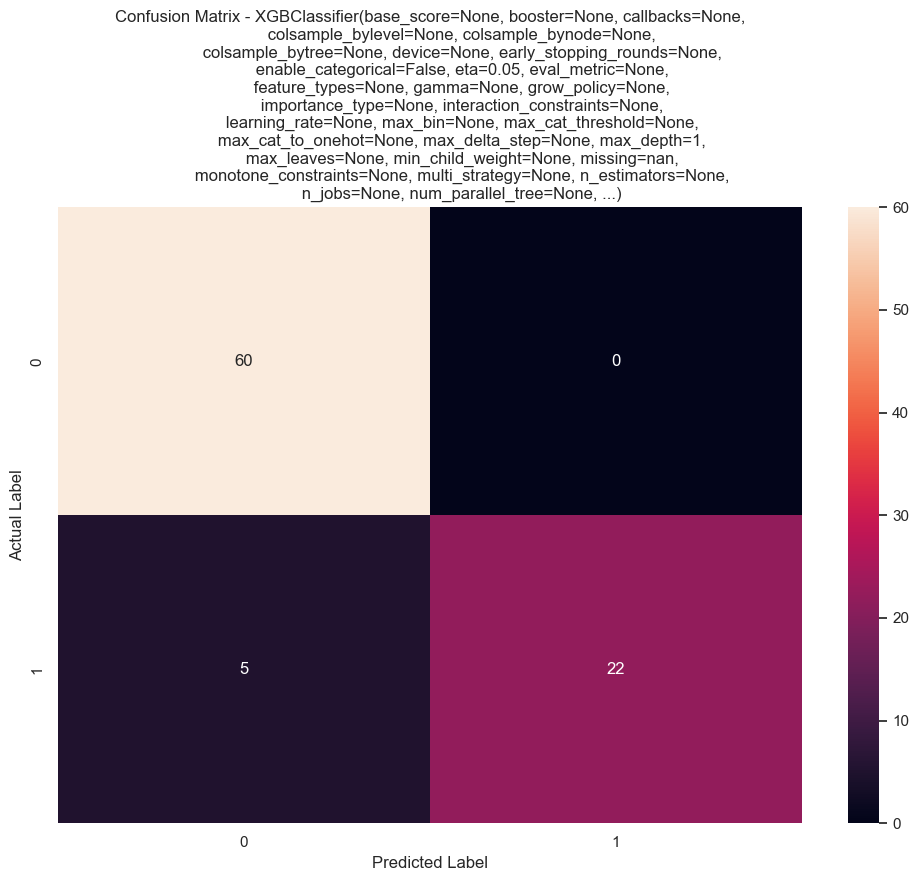

In [402]:
#COnfusion Metric
confusion(xg_tuned)

Dengan metric utama pada modeling adalah recall, dimana berfungsi untuk mendeteksi sebanyak-banyaknya karyawan yang resign dan benar-benar resign (TP). 

Dari confusion metrix terlihat jumlah karyawan yang resign dan benar-benar resign(TP) sebanyak 22, sedangkan karyawan yang tidak resign sebanyak (TN) 60.

Dan karyawan yang terdeteksi tidak resign tetapi pada kenyataannya resign adalah 5 karyawan (FN) dan sedangkan karyawan yang sebenarnya tidak resign tetapi terdeteksi resign (FP) sebanyak 0 karyawan.


#### Mencari metode Interpretable / Explainable AI yang ada untuk mendapatkan insight-insight yang berhubungan dengan permasalahan utama.


Text(0.5, 1.0, 'Permutation Feature Importance')

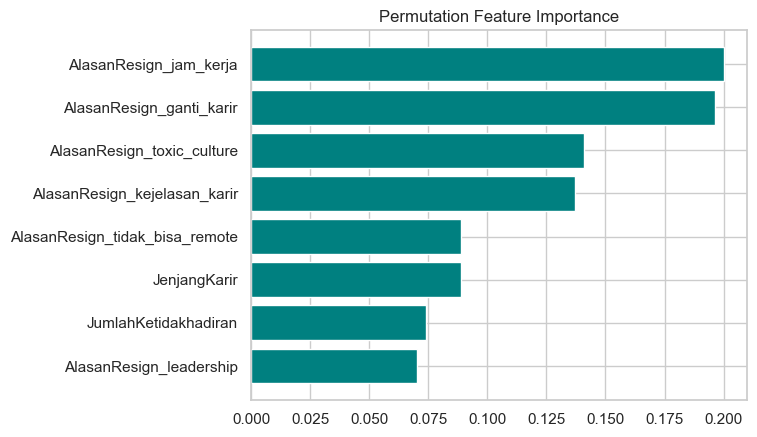

In [415]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(xg, Xtest, ytest, n_repeats=10, random_state=13, scoring='recall')
sorted_idx = perm_importance.importances_mean.argsort()[-8:]

# Set the color to teal
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center', color='teal')

plt.yticks(range(len(sorted_idx)), np.array(Xtest.columns)[sorted_idx])
plt.title('Permutation Feature Importance')


Feature yang paling berpengaruh adalah feature AlasanResign, dengan top 3 alasan resign yang paling berpengaruh adalah 

Jam Kerja

Ganti Karir

Toxic Culture

Alasan Resign ini seperti pada tahap EDA, didominasi oleh fresgraduate program dan mid level. 


#### Recommendation Business


**Alasan Resign Jam Kerja**

Selidiki penyebab, pantau dan evaluati beban kerja karyawan supaya jam kerja yang terlalu padat tidak menjadi hambatan bagi karyawan menjaga keseimbangan hidup. Pertimbangkan untuk memberikan opsi kerja fleksibel atau kebijakan kerja dari jarak jauh. Ini dapat membantu mengurangi tekanan yang mungkin disebabkan oleh jam kerja yang tidak fleksibel.
Penelitian menunjukkan beban kerja yang terlalu padat berdampak negatif. Selidiki penyebab dan berikan opsi kerja fleksibel." - Dr. Jane Doe.

**Alasan Resign Ganti Karir**

Sediakan jalur karir yang terdefinisi dengan baik dan jelas agar pegawai memiliki visi dan motivasi untuk tetap berkembang di perusahaan. Ini akan membantu mempertahankan karyawan di semua tingkatan, termasuk Middle dan Senior. 
Jalur karir yang jelas adalah motivasi utama. Penelitian menegaskan perusahaan dengan jalur karir yang jelas mempertahankan karyawan." - Prof. John Smith.


**Alasan Resign Toxic Culture**

Selidiki penyebab toksisitas dalam budaya perusahaan. Ini bisa termasuk evaluasi hubungan antara atasan dan bawahan, tingkat stres di lingkungan kerja, atau masalah komunikasi yang perlu diatasi. Fokus pada pengembangan keterampilan kepemimpinan manajer untuk menciptakan lingkungan kerja yang positif, di mana karyawan merasa dihargai dan didukung.Selalu berikan saluran komunikasi yang terbuka agar karyawan dapat melaporkan masalah dan memberikan masukan untuk perbaikan budaya perusahaan.

Penelitian psikologi organisasi menunjukkan budaya toksik merugikan kesejahteraan karyawan. Selidiki dan atasi penyebabnya." - Dr. Emily Johnson.




